# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [4]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [6]:
#SEU CÓDIGO AQUI
base = pd.read_csv('CARRO_CLIENTES.csv')

In [7]:
base

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [8]:
base.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [9]:
base.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [10]:
base['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
label_encoder = LabelEncoder()

In [12]:
base['Gender_encoded'] = label_encoder.fit_transform(base['Gender'])

base.drop(columns=['Gender'], inplace=True)

base.drop(columns=['User ID'], inplace=True)

In [13]:
base.dtypes

Age               int64
AnnualSalary      int64
Purchased         int64
Gender_encoded    int32
dtype: object

In [14]:
distribuicao = base['Purchased'].value_counts()
print(distribuicao)

Purchased
0    598
1    402
Name: count, dtype: int64


In [15]:
base

,Age,AnnualSalary,Purchased,Gender_encoded
0,35,20000,0,1
1,40,43500,0,1
2,49,74000,0,1
3,40,107500,1,1
4,25,79000,0,1
...,...,...,...,...
995,38,59000,0,1
996,47,23500,0,0
997,28,138500,1,0
998,48,134000,1,0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [17]:
#SEU CÓDIGO AQUI

Feito no enunciado 1.

# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

<Axes: >

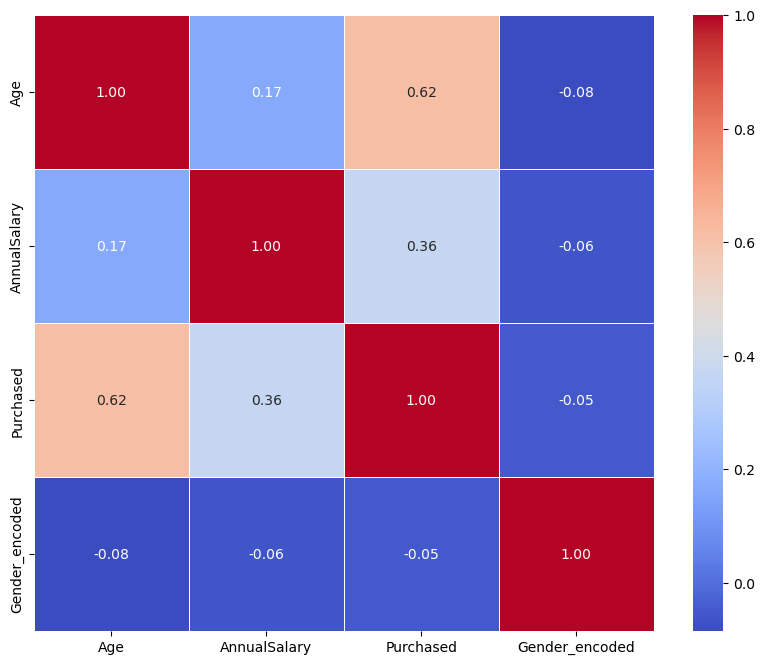

In [20]:
#SEU CÓDIGO AQUI
correlation_matrix = base.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

A variável 'Age' é a que apresenta a maior correlação com a variável target 'Purchased', seguido da variável 'AnnualSalary', e com a variável 'Gender' tendo muito pouca correlação.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [23]:
#SEU CÓDIGO AQUI
X = base.drop(columns=['Purchased'])
Y = base['Purchased']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
X

,Age,AnnualSalary,Gender_encoded
0,35,20000,1
1,40,43500,1
2,49,74000,1
3,40,107500,1
4,25,79000,1
...,...,...,...
995,38,59000,1
996,47,23500,0
997,28,138500,0
998,48,134000,0


In [26]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [28]:
#SEU CÓDIGO AQUI
#model_xgboost_hyper = xgb.XGBClassifier(
    #learning_rate=0.1,
    #early_stopping_rounds=10,
    #max_depth=6,
    #n_estimators=100,
#)

In [29]:
#model_xgboost_hyper = xgb.XGBClassifier().fit(X_train, Y_train)

In [30]:
model_xgboost_hyper = xgb.XGBClassifier(
  learning_rate=0.1,
  max_depth=6,
  n_estimators=100,
  early_stopping_rounds=10,
  eval_metric='logloss'
)

In [31]:
model_xgboost_hyper.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [33]:
#SEU CÓDIGO AQUI
Y_pred = model_xgboost_hyper.predict(X_test)
Y_pred_prob = model_xgboost_hyper.predict_proba(X_test)

In [34]:
Y_pred_prob

array([[0.8037839 , 0.1962161 ],
       [0.11110765, 0.88889235],
       [0.9948206 , 0.0051794 ],
       [0.7294981 , 0.2705019 ],
       [0.22339958, 0.7766004 ],
       [0.06241989, 0.9375801 ],
       [0.01468617, 0.98531383],
       [0.9941875 , 0.00581255],
       [0.97321576, 0.02678423],
       [0.99033797, 0.00966205],
       [0.8996639 , 0.10033605],
       [0.99481237, 0.00518765],
       [0.7234684 , 0.27653155],
       [0.99403435, 0.00596564],
       [0.02992558, 0.9700744 ],
       [0.10126156, 0.89873844],
       [0.54100454, 0.45899543],
       [0.14954472, 0.8504553 ],
       [0.07626456, 0.92373544],
       [0.9948206 , 0.0051794 ],
       [0.99415463, 0.00584537],
       [0.01863003, 0.98137   ],
       [0.03927386, 0.96072614],
       [0.9948206 , 0.0051794 ],
       [0.04181749, 0.9581825 ],
       [0.8996639 , 0.10033605],
       [0.05130208, 0.9486979 ],
       [0.01472682, 0.9852732 ],
       [0.99403435, 0.00596564],
       [0.704583  , 0.295417  ],
       [0.

# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [67]:
#SEU CÓDIGO AQUI
#Y_pred_original = label_encoder.inverse_transform(Y_pred)
#Y_test_original = label_encoder.inverse_transform(Y_test)

In [69]:
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f'Acurácia: {accuracy:.4f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

Acurácia: 0.9100
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       112
           1       0.93      0.86      0.89        88

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

Matriz de Confusão:
[[106   6]
 [ 12  76]]


# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

In [72]:
#SEU CÓDIGO AQUI
importances = model_xgboost_hyper.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance'])
importance_df['Importance'] = importance_df['Importance'].astype(float)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

          Feature  Importance
0             Age    6.370523
1    AnnualSalary    3.389990
2  Gender_encoded    0.814533


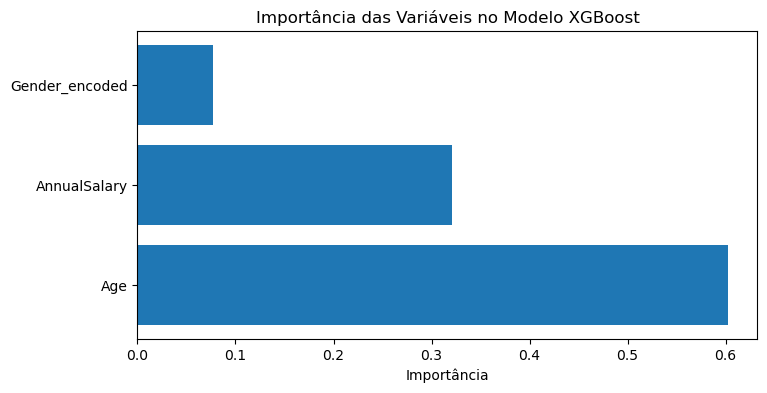

In [74]:
importances_2 = model_xgboost_hyper.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
plt.barh(features, importances_2)
plt.xlabel('Importância')
plt.title('Importância das Variáveis no Modelo XGBoost')
plt.show()

In [78]:
print(importances_2)

[0.602411   0.32056504 0.07702405]


Sim, as feature importances são as mesmas, na mesma ordem de maior pra menos de correlação em relação à variável target.